In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


%matplotlib inline

# Reading the Dataset

In [180]:
data_new = pd.read_csv('pltv_one.csv')

# Displaying the First 10 Rows of the Data

In [181]:
data_new.head(10)

,Product Name,Amount,Quantity,Date,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Pepsi 1,214316.0,4063.0,2021-04-21 12:45:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Margherita Pizza,252583.0,2261.0,2021-04-21 13:18:23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,French Fries,161518.0,1946.0,2021-04-21 13:20:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Chicken Delight,126738.0,662.0,2021-04-21 13:20:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Garden Fresh Pizza,115718.0,561.0,2021-04-20 15:41:17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Meal For 2 Veg,116821.0,246.0,2021-04-21 14:01:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Cheese Garlic Bread,57103.0,838.0,2021-04-20 19:01:49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Water Bottle 1,46682.0,777.0,2021-04-20 15:09:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Corn Exotica Pizza,81515.0,333.0,2021-04-21 12:45:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Panner Tandoori Pizza,88530.0,308.0,2021-04-20 14:52:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Dropping Unnecesary Columns

In [182]:
data_new.drop(['Date','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7',	'Unnamed: 8',	'Unnamed: 9',	'Unnamed: 10' ],axis=1,inplace=True)

# After Dropping the Columns the New DataSet is Displayed

In [183]:
data_new.head(5)

,Product Name,Amount,Quantity
0,Pepsi 1,214316.0,4063.0
1,Margherita Pizza,252583.0,2261.0
2,French Fries,161518.0,1946.0
3,Chicken Delight,126738.0,662.0
4,Garden Fresh Pizza,115718.0,561.0


# Finding Shape of the DataSet

In [184]:
data_new.shape

(83, 3)

# Describing the DataSet

In [185]:
data_new.describe()

,Amount,Quantity
count,82.000000,82.000000
mean,32804.548780,239.195122
std,44422.230604,554.661646
min,468.000000,2.000000
25%,7207.000000,25.500000
50%,19498.500000,65.000000
75%,39513.500000,231.250000
max,252583.000000,4063.000000


# Finding if there are Null entries in Each Column

In [186]:
data_new.isnull().sum()

Product Name    1
Amount          1
Quantity        1
dtype: int64

# Dropping Null Entries in Each Column

In [187]:
data_new.dropna()

,Product Name,Amount,Quantity
0,Pepsi 1,214316.0,4063.0
1,Margherita Pizza,252583.0,2261.0
2,French Fries,161518.0,1946.0
3,Chicken Delight,126738.0,662.0
4,Garden Fresh Pizza,115718.0,561.0
...,...,...,...
77,Meal For 2 Non-veg,2180.0,4.0
78,Meal For 6 Veg,4092.0,3.0
79,Water Bottle,719.0,15.0
80,Chicken Wings,672.0,4.0


# Dropping the Categorical Column " Product Name " because there is no 
# continuous Numeric data

In [188]:
data_1 = data_new.drop(columns=['Product Name'])
data_1.head()

,Amount,Quantity
0,214316.0,4063.0
1,252583.0,2261.0
2,161518.0,1946.0
3,126738.0,662.0
4,115718.0,561.0


# Displaying the Last 10 rows of the DataSet

In [189]:
data_1.tail(10)

,Amount,Quantity
73,5156.0,18.0
74,2874.0,2.0
75,750.0,15.0
76,5346.0,6.0
77,2180.0,4.0
78,4092.0,3.0
79,719.0,15.0
80,672.0,4.0
81,468.0,3.0
82,NaN,NaN


# Again dropping null values from the newly working Dataset

In [190]:
data_1.dropna()

,Amount,Quantity
0,214316.0,4063.0
1,252583.0,2261.0
2,161518.0,1946.0
3,126738.0,662.0
4,115718.0,561.0
...,...,...
77,2180.0,4.0
78,4092.0,3.0
79,719.0,15.0
80,672.0,4.0


# Detecting if there are Outliers are present in ' Amount' Column

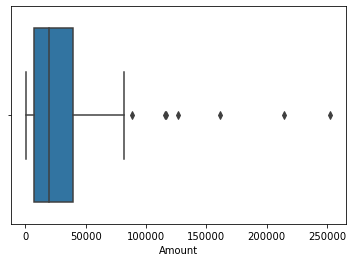

In [191]:
sns.boxplot(x = data_1['Amount'])

# Here are the Outliers are Removed By iqr Theorem

In [192]:
for i in ['Amount']:
    q3, q1 = np.percentile(data_1.loc[: , i],[75,25])
    iqr = q3 - q1
    
    
    max = q3 + (1.5 * iqr)
    min = q1 - (1.5 * iqr)
    
    #Replacing the Outlier Values with Nan
    
    data_1.loc[data_1[i] < min, i] = np.nan
    data_1.loc[data_1[i] > max, i] = np.nan

# The Cells which are replaced with Null Values are replaced with mean values
# of each column

In [193]:
data_1['Amount'].fillna(data_1['Amount'].mean(), inplace = True)

# Similarly in the Same Way Outliers are Removed from ' Quantity' Column

In [194]:
for i in ['Quantity']:
    q3, q1 = np.percentile(data_1.loc[: , i],[75,25])
    iqr = q3 - q1
    
    
    max = q3 + (1.5 * iqr)
    min = q1 - (1.5 * iqr)
    
    #Replacing the Outlier Values with Nan
    
    data_1.loc[data_1[i] < min, i] = np.nan
    data_1.loc[data_1[i] > max, i] = np.nan

In [195]:
data_1['Quantity'].fillna(data_1['Quantity'].mean(), inplace = True)

# Normalizing my Newly Working DataSet such that mean = 0, sd =1

In [196]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
columns = data_1.columns
data_1 = norm.fit_transform(data_1)

# Displaying First 10 rows of the DataSet

In [197]:
data_1 = pd.DataFrame(data_1, columns = columns)
data_1.head(10)

,Amount,Quantity
0,0.999820,0.018955
1,0.999960,0.008951
2,0.999927,0.012047
3,0.999986,0.005223
4,0.999988,0.004848
5,0.999998,0.002106
6,0.999892,0.014674
7,0.999862,0.016642
8,0.999992,0.004085
9,0.999994,0.003479


# Creating an Empty List to Store Inertia Values

In [198]:
SSE_scaled = []

In [199]:
from sklearn.cluster import KMeans

# Here the loop is run for 1 to 10 number of Custers and Corresponding 

# inertia value is calculated for Corresponding Number of Clusters

In [200]:
for cluster in range(1,10):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster)
    kmeans.fit(data_1)
    SSE_scaled.append(kmeans.inertia_)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning:

Text(0, 0.5, 'SSE')

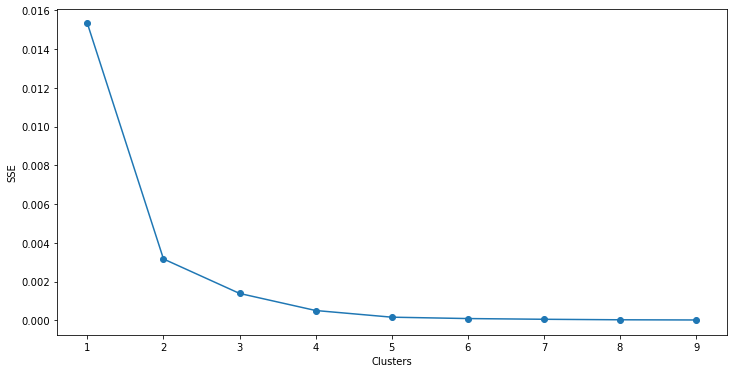

In [201]:
plt.figure(figsize=(12,6))
frame_scaled = pd.DataFrame({'Cluster': range(1,10), 'SSE': SSE_scaled})
plt.plot(frame_scaled['Cluster'], frame_scaled['SSE'], marker = 'o')
plt.xlabel("Clusters")
plt.ylabel("SSE")

# Here the Value of Elbow Curve starts at Value k = 3, therefore optimum 
# number of clusters is 3

In [202]:
kmeans = KMeans(n_jobs = -1, n_clusters =3)
pred = kmeans.fit_predict(data_1)


C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [203]:
frame = pd.DataFrame(data_1)

In [204]:
frame['cluster'] = pred

In [205]:
frame.head()

,Amount,Quantity,cluster
0,0.999820,0.018955,2
1,0.999960,0.008951,0
2,0.999927,0.012047,2
3,0.999986,0.005223,0
4,0.999988,0.004848,0


In [206]:
frame.tail(10)

,Amount,Quantity,cluster
73,0.999994,0.003491,0
74,1.000000,0.000696,0
75,0.999800,0.019996,2
76,0.999999,0.001122,0
77,0.999998,0.001835,0
78,1.000000,0.000733,0
79,0.999782,0.020858,2
80,0.999982,0.005952,0
81,0.999979,0.006410,0
82,0.999973,0.007291,0


In [207]:
frame['cluster'].value_counts()

0    63
2    15
1     5
Name: cluster, dtype: int64

# On the Basis of Amount and Quantity , the Clusters are Formed

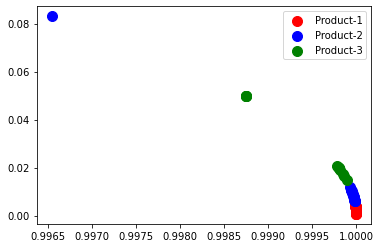

In [152]:
plt.scatter(data_1[pred == 0, 0], data_1[pred == 0, 1],
           s = 100, c= 'red', label = 'Product-1')
plt.scatter(data_1[pred == 1, 0], data_1[pred == 1, 1], 
           s = 100, c= 'blue', label = 'Product-2')

plt.scatter(data_1[pred == 2, 0], data_1[pred == 2, 1],
           s = 100, c= 'green', label = 'Product-3')








# Plotting the Centroids of Clusters
#plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 100, c = 'yellow', label = 'centroids')

plt.legend()
